In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-startups-top-300/Startups1.csv


## About Dataset

Context
A startup or start-up is a company or project undertaken by an entrepreneur to seek, develop, and validate a scalable business model. While entrepreneurship includes all new businesses, including self-employment and businesses that do not intend to go public, startups are new businesses that intend to grow large beyond the solo founder. In the beginning, startups face high uncertainty and have high rates of failure, but a minority of them do go on to be successful and influential.

Content
The following dataset has data about the Top 300 startups in India. Details about the columns are as follows:

- Company - Name of the Startup.
- City - The City in which the startup is started.
- Starting Year - The Year in which the startup was started.
- Founders - Name of the founders of the startup.
- Industries - Industrial domain in which the startup falls.
- No. of Employees - Number of employees in the startup.
- Funding Amount in USD - Total funding amount funded to the startup.
- Funding Rounds - Funding rounds are the number of times a startup goes back to the market to raise more capital. The goal of every round is for founders to trade equity in their business for the capital they can utilize to advance their companies to the next level.
- No. of Investors - Number of investors in the startup.

<h1 style="color: blue; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;font-size: 36px;">Indian Startups (EDA) </h1>


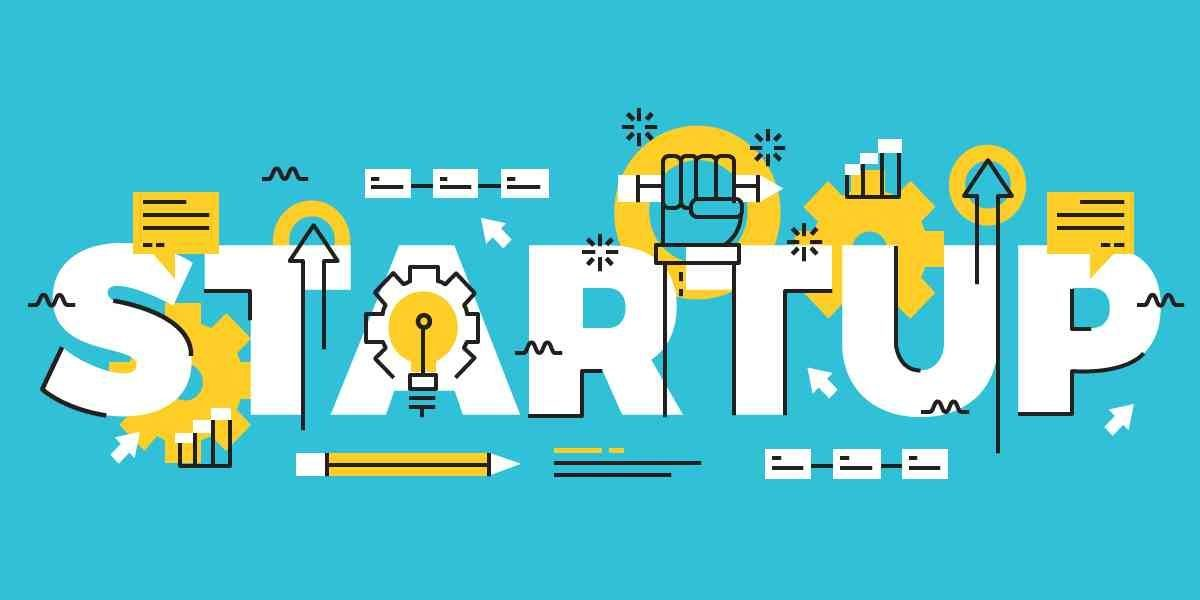

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid",rc = {'axes.facecolor': '#FBEAEB'})
pd.options.display.max_columns=50

In [3]:
# importing data 
df=pd.read_csv("/kaggle/input/indian-startups-top-300/Startups1.csv")
df.sample()

,Unnamed: 0,Company,City,Starting Year,Founders,Industries,Description,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
287,287,Ezetap,Bengaluru,2011,"Abhijit Bose, Bala Parthasarathy, Bhaktha Kesh...","Mobile, Payments, Point of Sale, Software",Ezetap Mobile Solutions is a company that crea...,101-250,51000000,6,8


## Workflow
- Understanding of data
- Data cleaning
- Exploratory Data Analysis
- Insights

<h1 style="color: black; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;font-size: 36px;">Understanding of data </h1>

In [4]:
# checking rows and columns count
df.shape

(300, 11)

> #### There are **300 rows and 11 columns**

In [5]:
# checking column name 
df.columns

Index(['Unnamed: 0', 'Company', 'City', 'Starting Year', 'Founders',
       'Industries', 'Description', 'No. of Employees', 'Funding Amount in $',
       'Funding Round', 'No. of Investors'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           300 non-null    int64 
 1   Company              300 non-null    object
 2   City                 300 non-null    object
 3   Starting Year        300 non-null    int64 
 4   Founders             300 non-null    object
 5   Industries           300 non-null    object
 6   Description          300 non-null    object
 7   No. of Employees     300 non-null    object
 8   Funding Amount in $  300 non-null    int64 
 9   Funding Round        300 non-null    int64 
 10  No. of Investors     300 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 25.9+ KB


> #### Everything is ok

In [7]:
# checking null values
df.isnull().sum()

Unnamed: 0             0
Company                0
City                   0
Starting Year          0
Founders               0
Industries             0
Description            0
No. of Employees       0
Funding Amount in $    0
Funding Round          0
No. of Investors       0
dtype: int64

> #### There is **no null values**

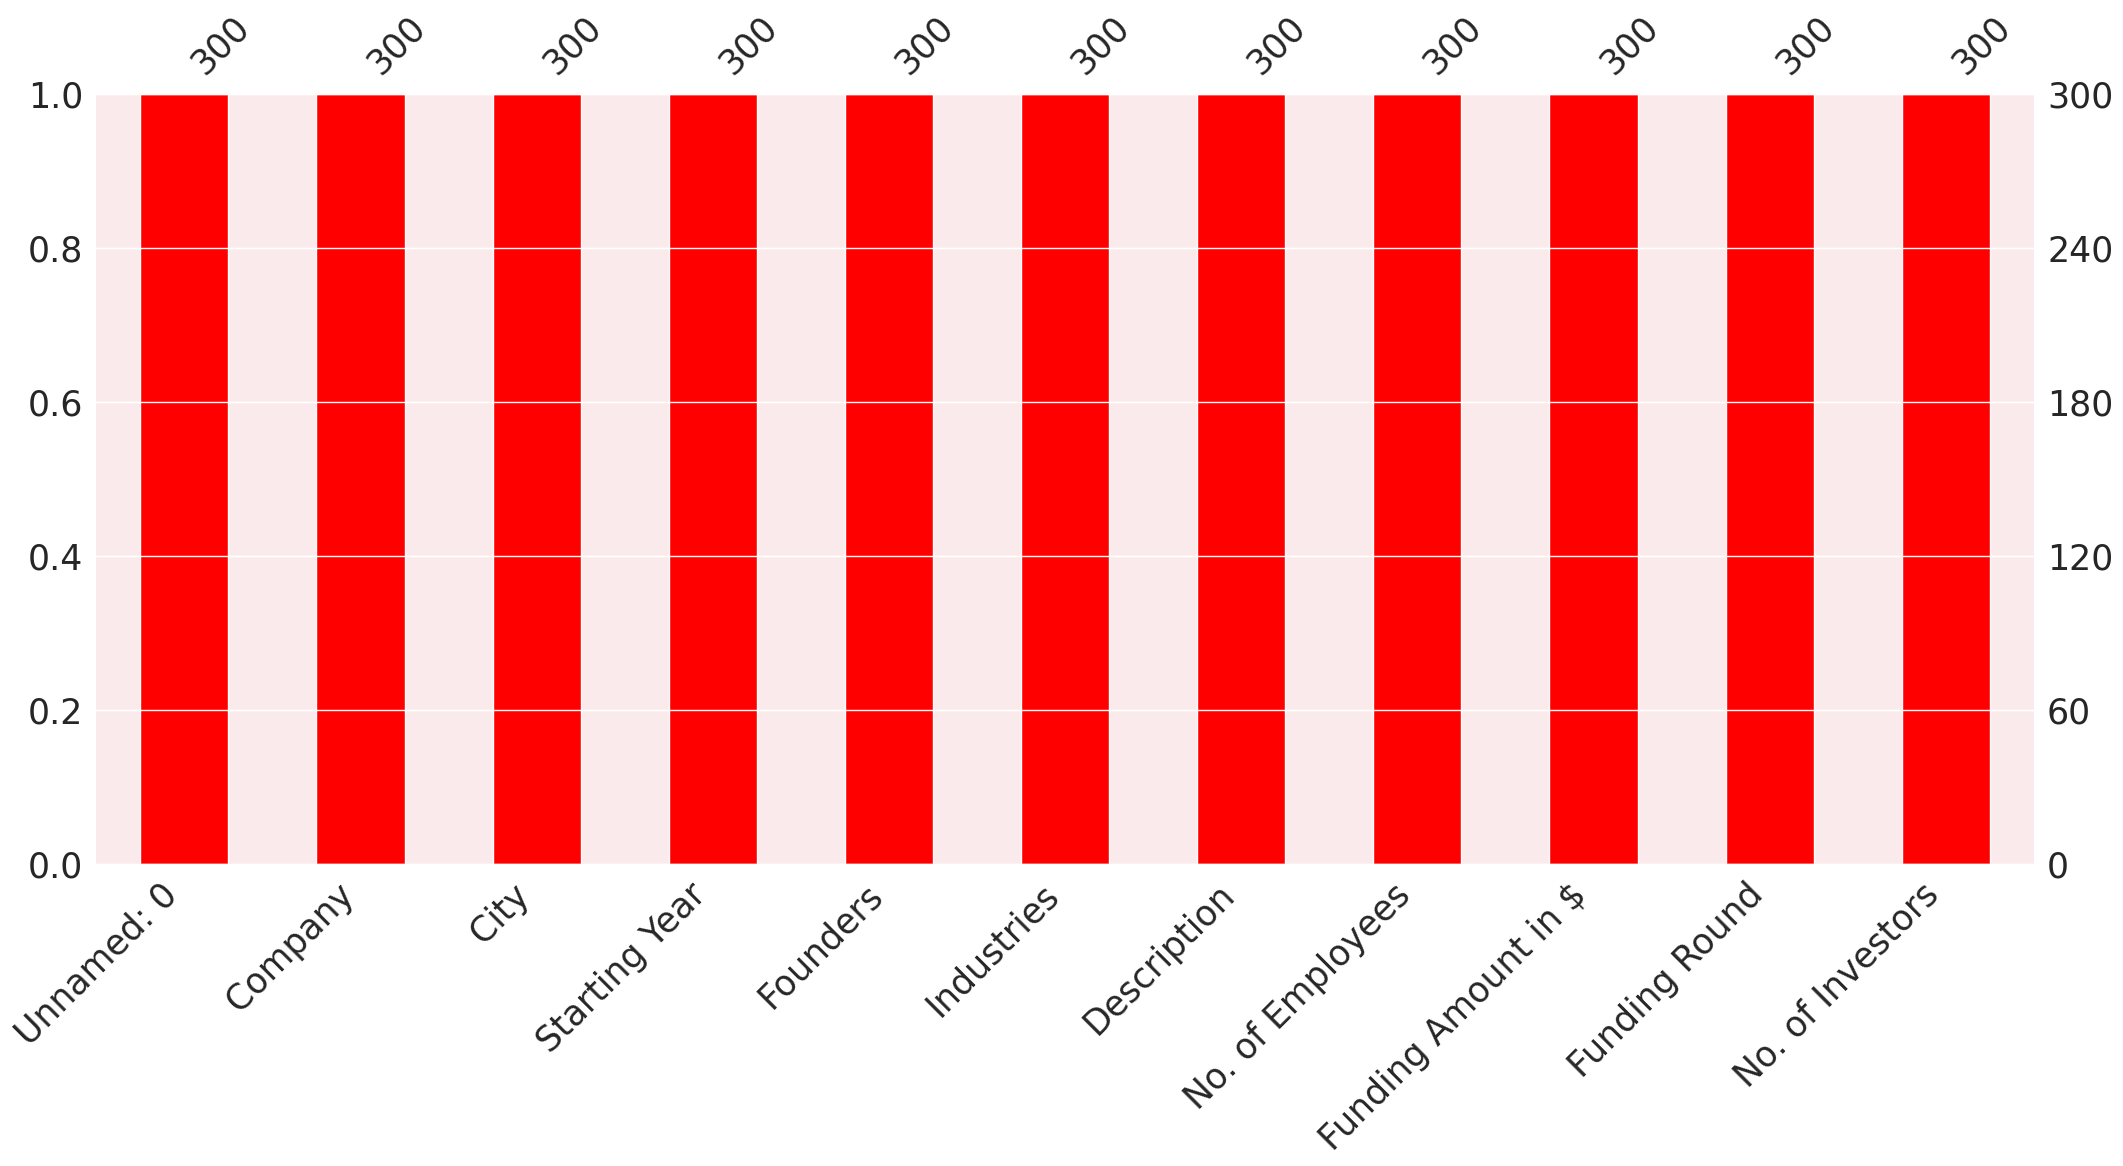

In [8]:
# checking null values in visualization
import missingno as msno 
msno.bar(df,color="red",fontsize=25);

In [9]:
# checking duplicates
df.duplicated().sum()

0

> #### No duplicate values are there

In [10]:
# checking unique values
for i in df.columns:
    print(i,"----------",df[i].unique(),"--------",df[i].nunique())

Unnamed: 0 ---------- [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,300.0,1.495000e+02,8.674676e+01,0.0,74.75,149.5,2.242500e+02,2.990000e+02
Starting Year,300.0,2.013393e+03,5.139390e+00,1984.0,2012.00,2015.0,2.016000e+03,2.020000e+03
Funding Amount in $,300.0,3.148655e+08,1.628802e+09,0.0,14287377.00,41087733.5,1.319438e+08,2.476762e+10
Funding Round,300.0,5.986667e+00,4.239465e+00,0.0,3.00,5.0,7.000000e+00,2.500000e+01
No. of Investors,300.0,1.055000e+01,7.530151e+00,0.0,5.00,9.0,1.400000e+01,4.500000e+01


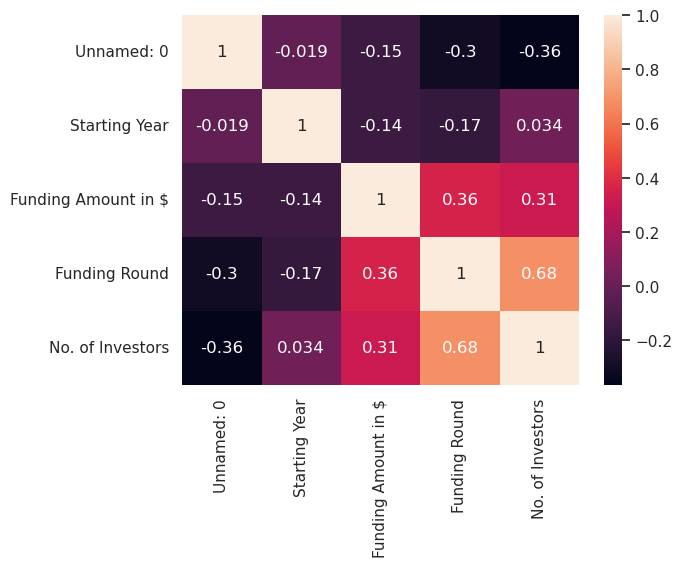

In [12]:
sns.heatmap(df.corr(),annot=True);

> #### There is **no correlation** between any columns

<h1 style="color: black; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;font-size: 36px;">Data Cleaning </h1>

In [13]:
df.sample()

,Unnamed: 0,Company,City,Starting Year,Founders,Industries,Description,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
107,107,Zomato,Gurgaon,2008,"Deepinder Goyal, Gaurav Gupta, Pankaj Chaddah","Food Delivery, Mobile Apps, Reservations, Rest...",Zomato is an online restaurant guide and food ...,10001+,2100568357,21,25


In [14]:
# Droping column unnamed  and description
df.drop(columns=["Unnamed: 0","Description"],inplace=True)

In [15]:
df["Industries_type 1"]=df["Industries"].str.split(",",expand=True)[0]

In [16]:
df["Industries_type 2"]=df["Industries"].str.split(",",expand=True)[1]

In [17]:
df[df["Industries_type 2"].isnull()]

,Company,City,Starting Year,Founders,Industries,No. of Employees,Funding Amount in $,Funding Round,No. of Investors,Industries_type 1,Industries_type 2
29,Bharat Biotech,Hyderabad,1996,"Krishna Ella, Suchitra Ella",Biotechnology,501-1000,14100000,3,3,Biotechnology,None
52,WhiteHat Education Technology,Andheri,2018,Karan Bajaj,Education,101-250,11294388,2,3,Education,None
105,smallcase,Bengaluru,2015,"Anugrah Shrivastava, Rohan Gupta, Vasanth Kamath",Financial Services,101-250,22000000,3,11,Financial Services,None
134,Polygon (Previously Matic Network),Mumbai,2017,Not Available,Blockchain,11-50,450000,3,4,Blockchain,None
137,Dukaan®,Bengaluru,2019,"Kaustub Pandey, Subhash Choudhary, Suumit Shah",DIY,11-50,6000000,1,9,DIY,None
154,QuickSell,Mumbai,2017,Deepak Bhagchandani,Software,11-50,2225000,2,6,Software,None
189,F5 Refreshement,New Delhi,2018,"Lalit Aggarwal, Raghav Arora",Food and Beverage,51-100,621291,2,6,Food and Beverage,None
201,SleepyCat,Mumbai,2017,Kabir Siddiq,E-Commerce,1-10,1320000,1,3,E-Commerce,None
273,Setu,Bengaluru,2018,Sahil Kini,Financial Services,11-50,18549687,2,4,Financial Services,None
277,LiquiLoans,Mumbai,2018,"Achal Mittal, Gautam Adukia",Financial Services,11-50,1784442,3,6,Financial Services,None


In [18]:
## Filling industries 2
l=[29,52,105,134,137,154,189,201,273,277]
for i in l:
    df["Industries_type 2"].iloc[i]="None"

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [19]:
df["Industries_type 2"].isnull().sum()

0

In [20]:
#Creating a column to check how old the company is 
df["age"]=df["Starting Year"].max()-df["Starting Year"]

> ### **Creating a column of Age through feature engineering** to check how old the company is 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


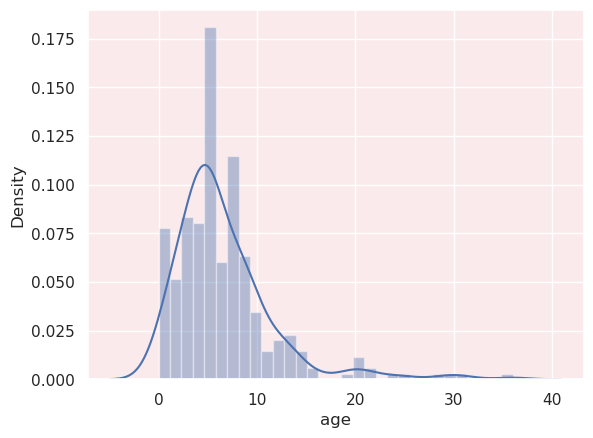

In [21]:
sns.distplot(df["age"]);

In [22]:
# Dividing the age of the company into 3 segments 
df["age_category"]=pd.cut(df.age,[-1,5,15,np.inf],labels=["new company","old company","older company"])

> ## **Creating a column of Age category through feature engineering** to check which category company belongs is it new, old or older 

<h1 style="color: black; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;font-size: 36px;">Exploratory data analysis & Insights </h1>

In [23]:
df.sample()

,Company,City,Starting Year,Founders,Industries,No. of Employees,Funding Amount in $,Funding Round,No. of Investors,Industries_type 1,Industries_type 2,age,age_category
94,Urban Ladder,Bengaluru,2012,"Ashish Goel, Rajiv Srivatsa","E-Commerce, E-Commerce Platforms, Furniture, H...",501-1000,114896667,9,10,E-Commerce,E-Commerce Platforms,8,old company


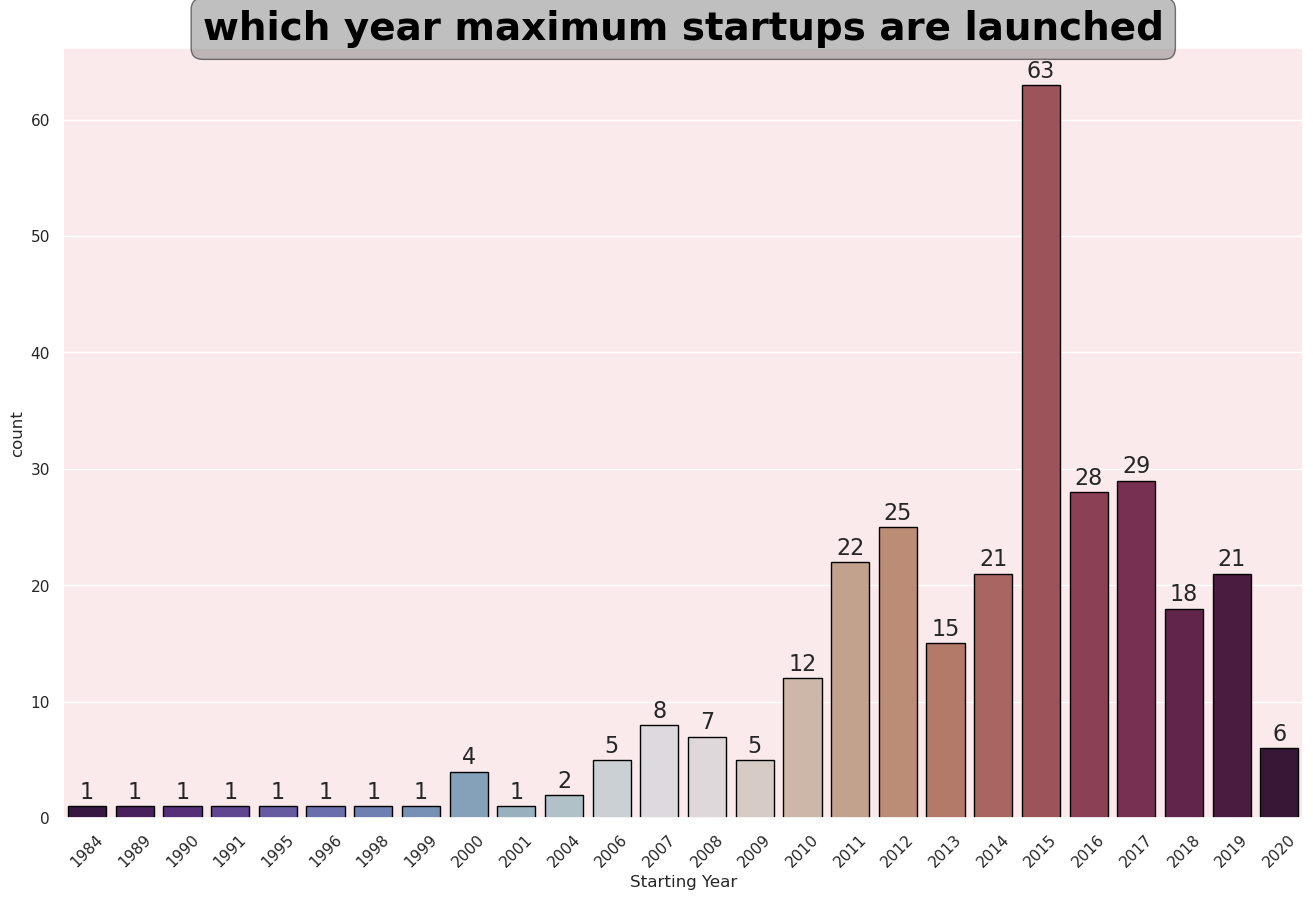

In [24]:
## In which year maximum startups are launched
plt.figure(figsize=(16,10))
ax=sns.countplot(x="Starting Year",data=df,palette='twilight_shifted',edgecolor="black")
plt.xticks(rotation=45)
plt.title('which year maximum startups are launched', fontdict={'fontsize': 28, 'color': 'black', 'fontweight': 'bold'}, bbox=dict(boxstyle='round', facecolor='grey', alpha=0.5,edgecolor='black'));

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',fontsize=16,
                xytext = (0, 10),
                textcoords = 'offset points')

> ## ➡️ In **2015** maximum startups were born which is **63** 

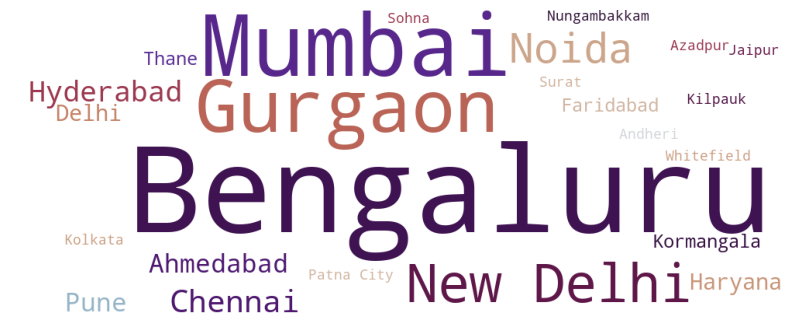

In [25]:
## In which city maximum startups are launched
from wordcloud import WordCloud as word
wc = word(background_color='white', width=1000, height=400,colormap="twilight_shifted")
wc.generate_from_frequencies(df["City"].value_counts())
plt.figure(figsize=(10,13),dpi=100)
plt.imshow(wc)
plt.axis('off')
plt.show()

>## ➡️ From **Bengaluru** maximum startups were born

Not Available             9
Vijay Shekhar Sharma      3
Amit Jain, Anurag Jain    2
Mukesh Ambani             2
Name: Founders, dtype: int64


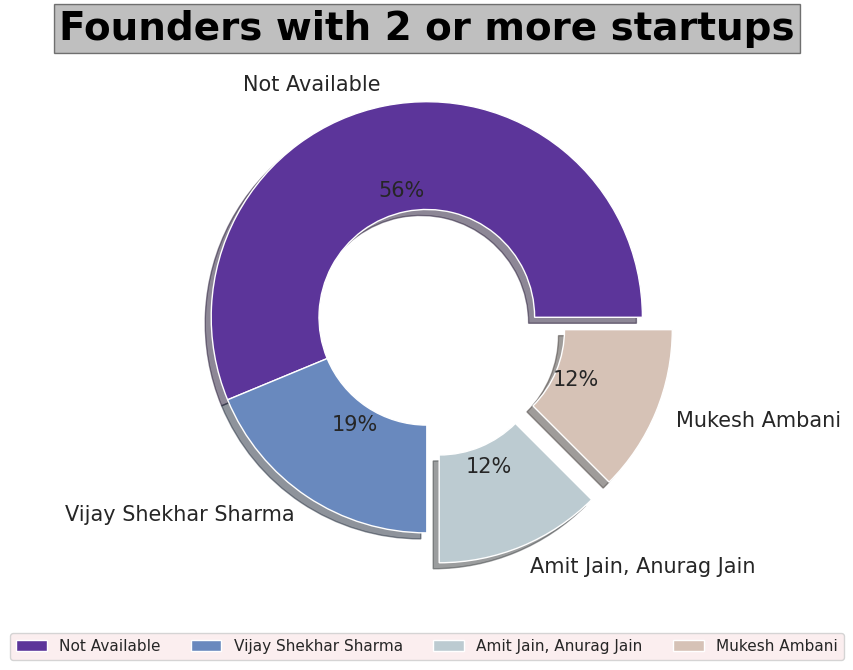

In [26]:
# Which founders were involved in 2 or more startups?
x=df["Founders"].value_counts().sort_values(ascending=False).head(4)
print(x)
color=sns.color_palette("twilight_shifted")
plt.figure(figsize=(7,7))
plt.pie(x,labels=x.index,autopct="%0.0f%%",textprops={"fontsize":15},wedgeprops={"width":0.5},shadow=True,colors=color,explode=[0,0,0.15,0.15])
plt.legend(loc="lower center",bbox_to_anchor=(0.5,-0.15),ncol=4)
plt.title('Founders with 2 or more startups', fontdict={'fontsize': 28, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));

>## ➡️ The Founder with 9 startups name is not available in the data where as             **vivek shekhar sharma has the highest startups with 3**

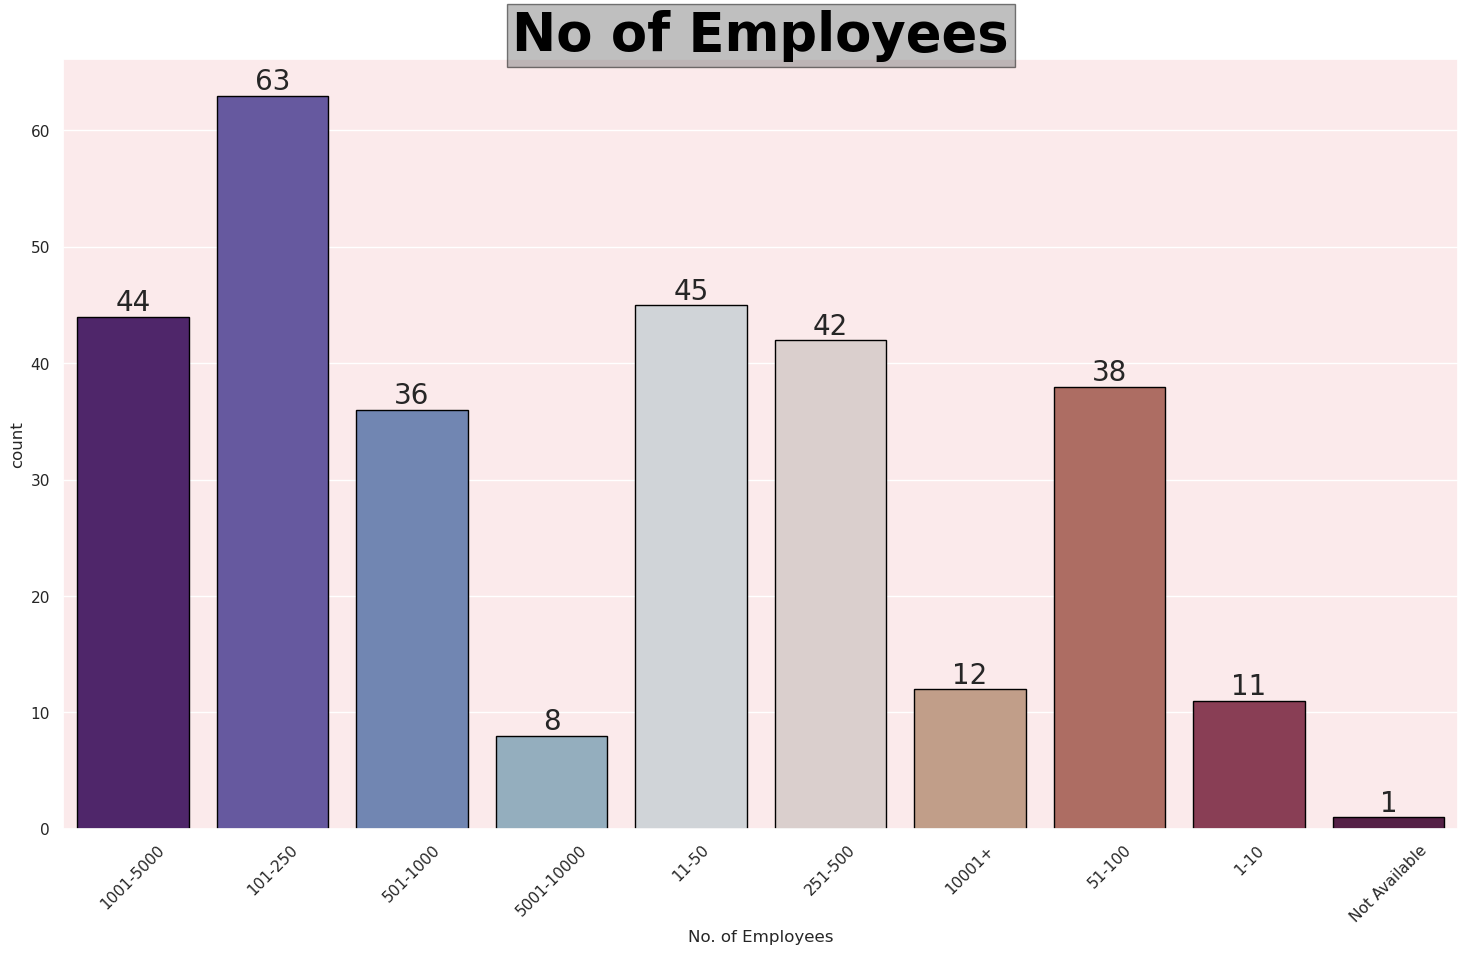

In [27]:
# what were the Noc of Employees in the startups
plt.figure(figsize=(18,10))
ax=sns.countplot(x="No. of Employees",data=df,palette='twilight_shifted',edgecolor="black")
plt.xticks(rotation=45)
plt.title('No of Employees', fontdict={'fontsize': 38, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',fontsize=20,
                xytext = (0, 10),
                textcoords = 'offset points')

>## ➡️ Mostly Startups has between **101-250 of employess**

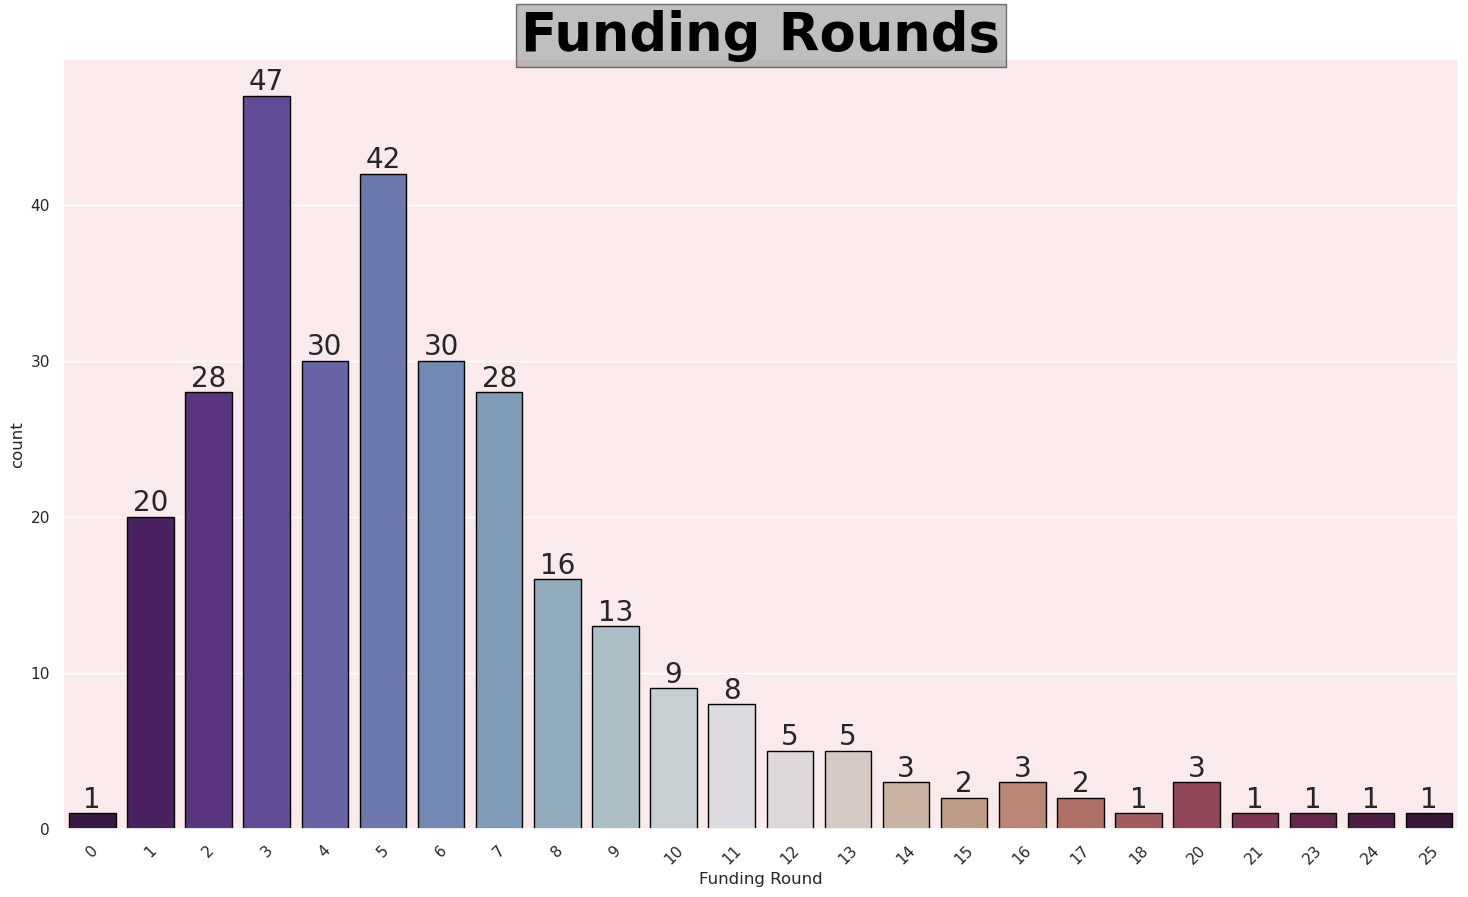

In [28]:
# which was the maximum funding round 
plt.figure(figsize=(18,10))
ax=sns.countplot(x="Funding Round",data=df,palette='twilight_shifted',edgecolor="black")
plt.xticks(rotation=45)
plt.title('Funding Rounds', fontdict={'fontsize': 38, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',fontsize=20,
                xytext = (0, 10),
                textcoords = 'offset points')

>## ➡️ 47 Startups has **3 Funding rounds** where as 42 startups has gone to **5 funding rounds**

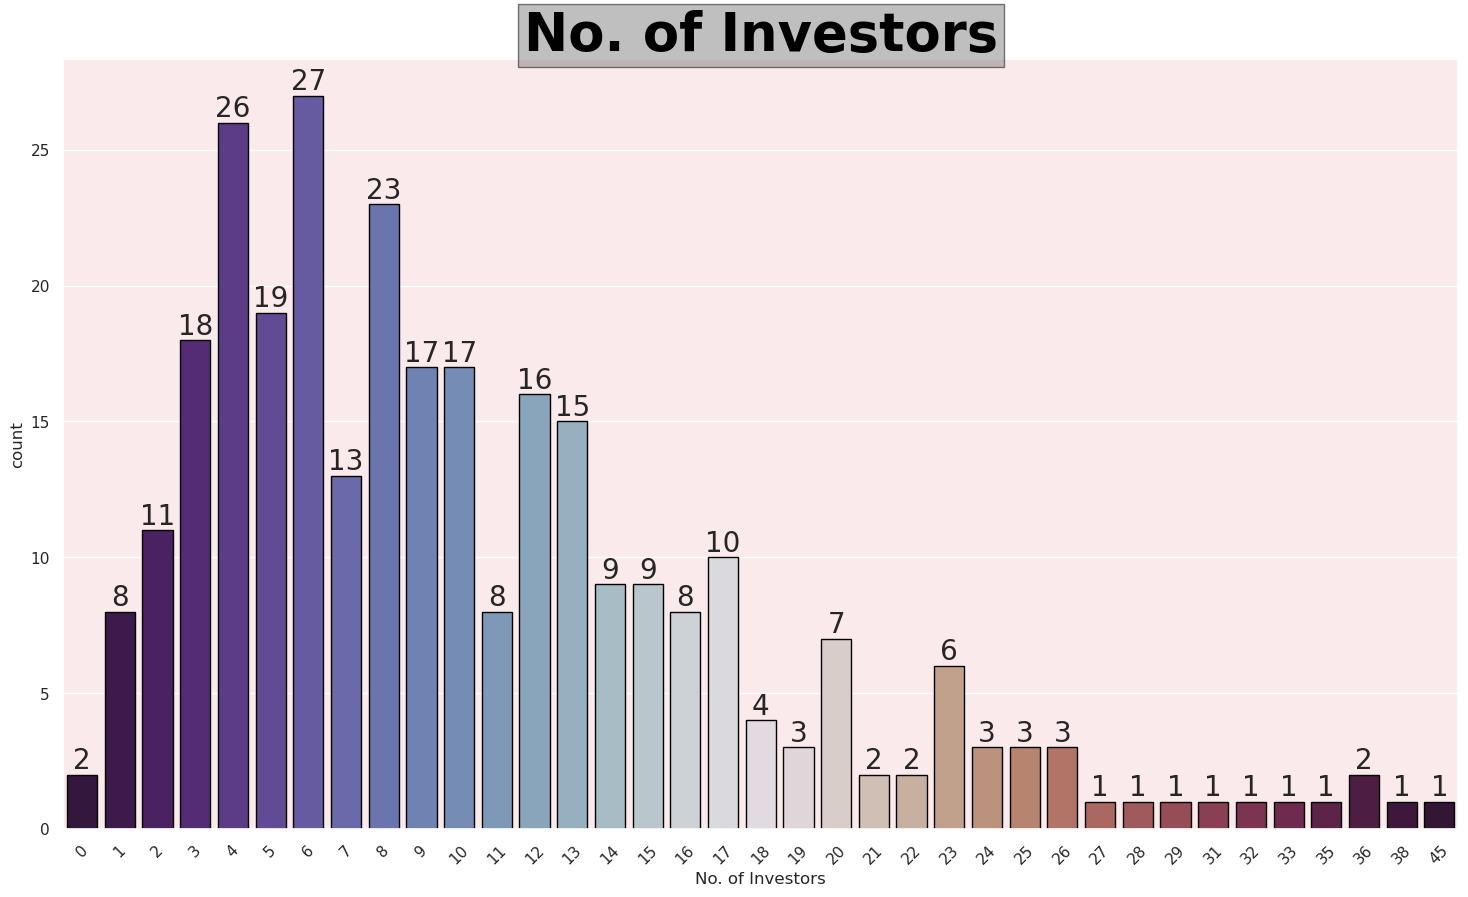

In [29]:
# Mostly startups has how many investors
plt.figure(figsize=(18,10))
ax=sns.countplot(x="No. of Investors",data=df,palette='twilight_shifted',edgecolor="black")
plt.xticks(rotation=45)
plt.title('No. of Investors', fontdict={'fontsize': 38, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',fontsize=20,
                xytext = (0, 10),
                textcoords = 'offset points')

>## ➡️ Mostly startups has **4 and 6 investors**

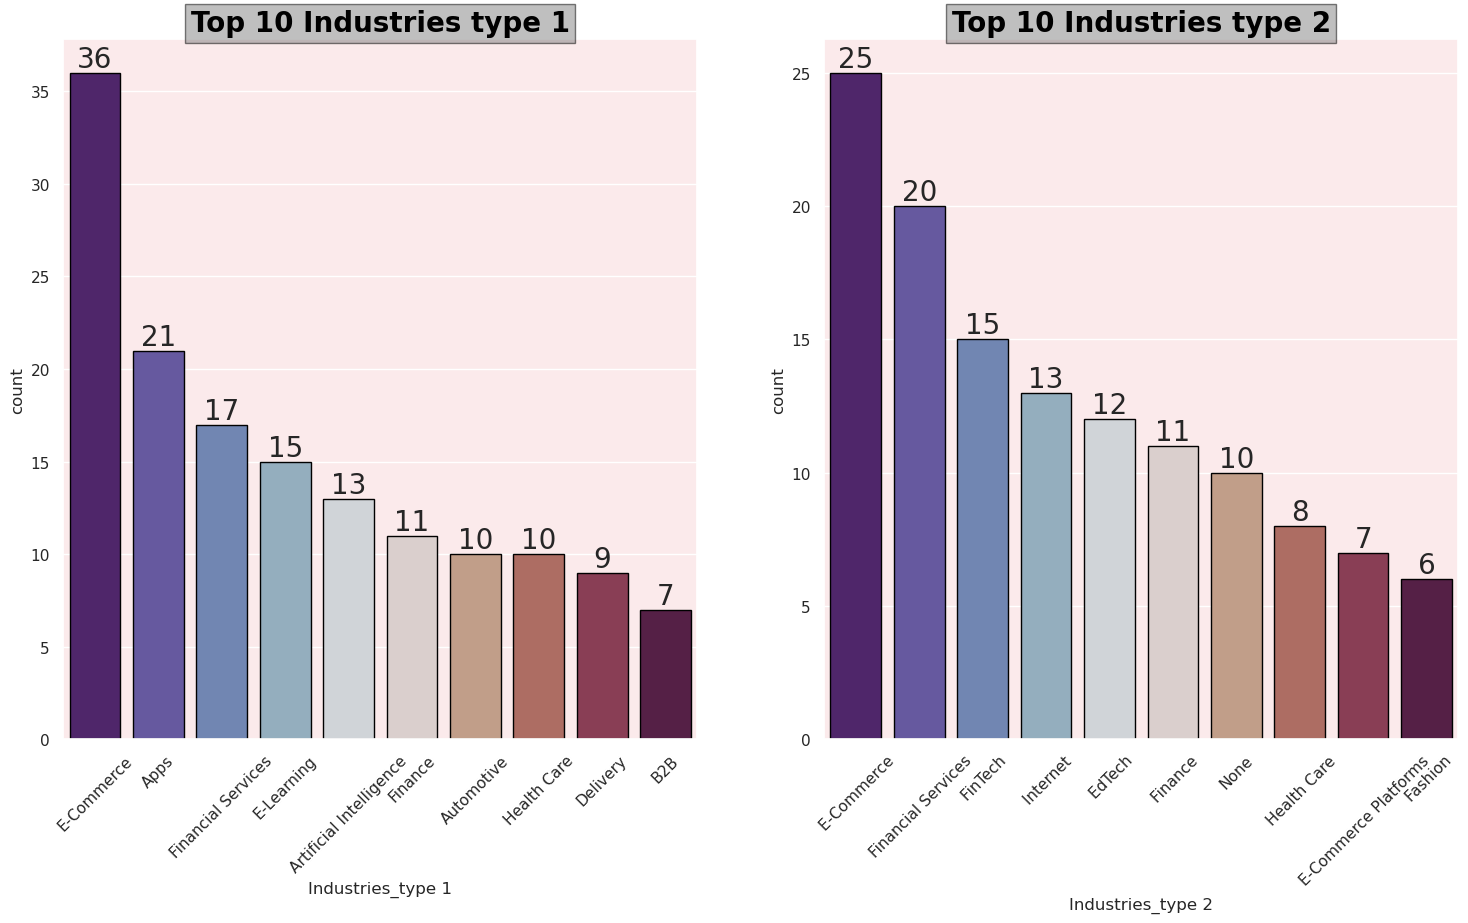

In [30]:
# Which were the top 10 Industries_type 1 and Industries_type 2
b=df["Industries_type 1"].value_counts().head(10)
plt.figure(figsize=(18,20),dpi=100)
plt.subplot(2,2,1)
ax=sns.countplot(x="Industries_type 1",data=df,order=b.index,palette='twilight_shifted',edgecolor="black")
plt.xticks(rotation=45)
plt.title('Top 10 Industries type 1', fontdict={'fontsize': 20, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',fontsize=20,
                xytext = (0, 10),
                textcoords = 'offset points')

plt.subplot(2,2,2)
c=df["Industries_type 2"].value_counts().head(10)
ay=sns.countplot(x="Industries_type 2",data=df,order=c.index,palette='twilight_shifted',edgecolor="black")
plt.xticks(rotation=45)
plt.title('Top 10 Industries type 2', fontdict={'fontsize': 20, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));

for y in ay.patches:
    ay.annotate(format(y.get_height(), '.0f'),
                (y.get_x() + y.get_width() / 2., y.get_height()),
                ha = 'center', va = 'center',fontsize=20,
                xytext = (0, 10),
                textcoords = 'offset points')


>## ➡️ Top Industry type is **E-Commerce and Financial Services**

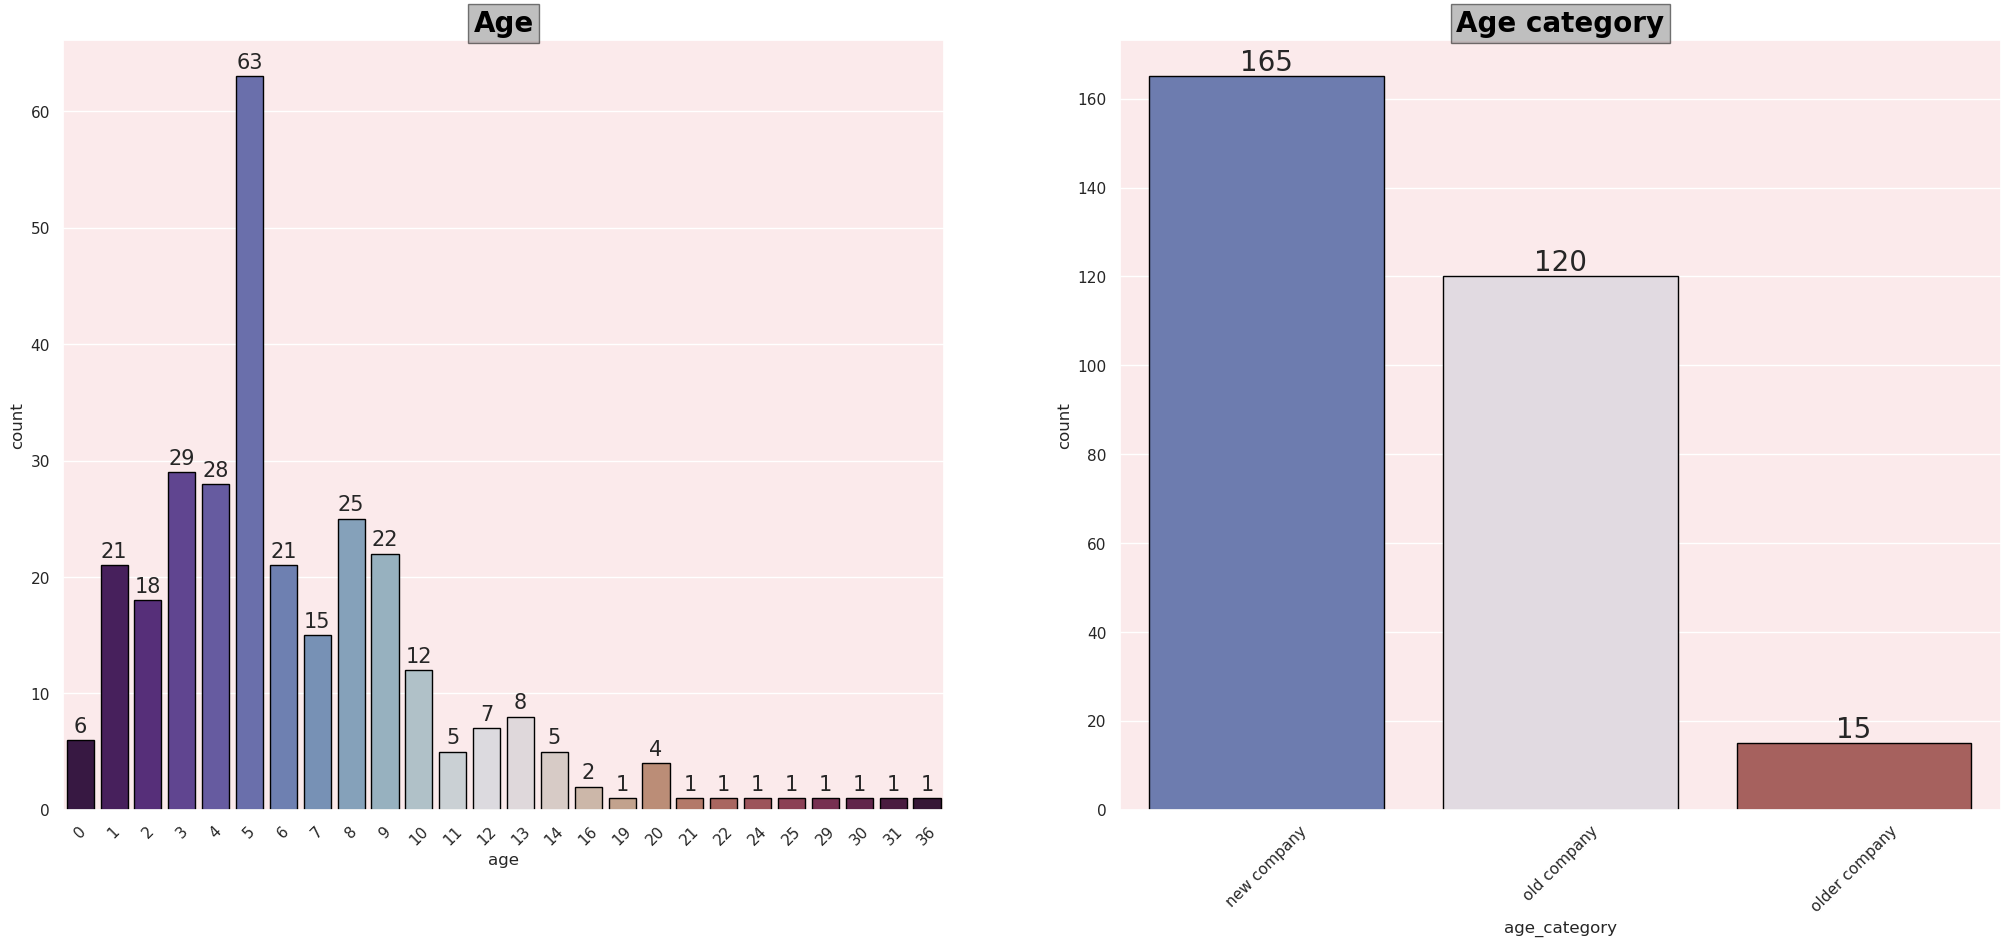

In [31]:
# how old can the company is which age category they belong
plt.figure(figsize=(25,22),dpi=100)
plt.subplot(2,2,1)
ab= sns.countplot(x="age",data=df,palette='twilight_shifted',edgecolor="black")
plt.xticks(rotation=45)
plt.title('Age', fontdict={'fontsize': 20, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));

for p in ab.patches:
    ab.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',fontsize=15,
                xytext = (0, 10),
                textcoords = 'offset points')


plt.subplot(2,2,2)
ac=sns.countplot(x="age_category",data=df,palette='twilight_shifted',edgecolor="black")
plt.xticks(rotation=45)
plt.title('Age category', fontdict={'fontsize': 20, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));

for j in ac.patches:
    ac.annotate(format(j.get_height(), '.0f'),
                (j.get_x() + j.get_width() / 2., j.get_height()),
                ha = 'center', va = 'center',fontsize=20,
                xytext = (0, 10),
                textcoords = 'offset points')


>## ➡️ Most of the company were **5 years old** and they were **New company**

In [32]:
## Which is the top company who got the maximum Funding Amount in $
df[df["Funding Amount in $"]==df["Funding Amount in $"].max()]

,Company,City,Starting Year,Founders,Industries,No. of Employees,Funding Amount in $,Funding Round,No. of Investors,Industries_type 1,Industries_type 2,age,age_category
32,Reliance Jio,Mumbai,2010,Mukesh Ambani,"Apps, Information Services, Internet, Telecomm...",10001+,24767620475,16,35,Apps,Information Services,10,old company


>## ➡️ **Reliance jio** has got the Maximum Funding 

In [33]:
# Which are the top 10 companies who got the maximum funding and they were in which City
df.groupby(["Starting Year","Company","City"])["Funding Amount in $"].max().sort_values(ascending=False).to_frame().head(10).style.background_gradient(cmap='twilight_shifted')


>## ➡️ These are the **Top 10 companies** who got the maximum funding and Which city they belongs to

In [34]:
## Which city startups has got the Highest funding
df.groupby("City")["Funding Amount in $"].sum().sort_values(ascending=False).to_frame().style.background_gradient(cmap='twilight_shifted')


,Funding Amount in $
City,
Mumbai,36055016291
Bengaluru,26207212825
Gurgaon,15827429512
Noida,6134005051
Kormangala,3836092733
New Delhi,1888117254
Chennai,849120965
Pune,659265509
Faridabad,638829632


>## ➡️ In **Mumbai** startups has got the highest sum of investment 

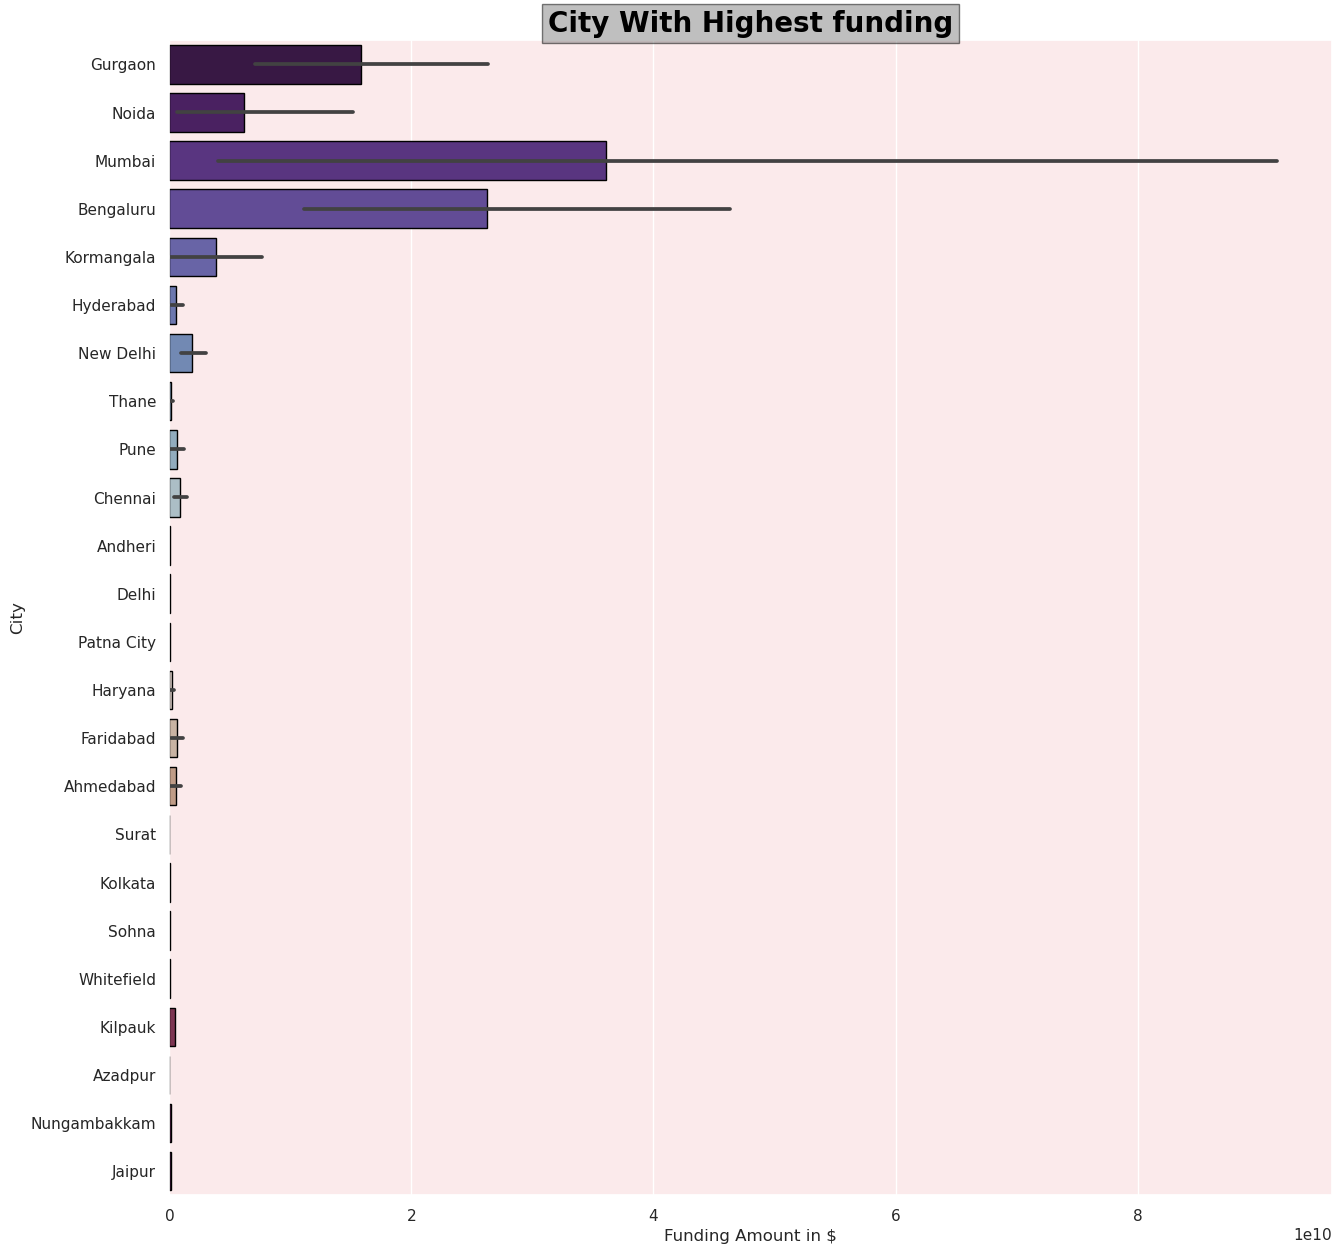

In [35]:
plt.figure(figsize=(15,15))
sns.barplot(x="Funding Amount in $",y="City",edgecolor="black",estimator=sum,data=df,palette='twilight_shifted');
plt.title('City With Highest funding', fontdict={'fontsize': 20, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));
    

>## ➡️ In **Mumbai** startups has got the highest sum of investment 

In [36]:
## Which company has the highest no of employees
df[df["No. of Employees"]=="10001+"][["Company","Funding Amount in $","City","Industries_type 1","No. of Investors"]].sort_values(by="Funding Amount in $",ascending=False).style.background_gradient(cmap='twilight_shifted')

,Company,Funding Amount in $,City,Industries_type 1,No. of Investors
32,Reliance Jio,24767620475,Mumbai,Apps,35
41,Flipkart,9009184737,Bengaluru,E-Commerce,24
37,Reliance Retail,6419310306,Mumbai,Consumer Goods,8
239,OYO,3439351106,Gurgaon,Hospitality,23
23,BYJU’S,2745964432,Bengaluru,E-Learning,38
143,Swiggy,2428380000,Bengaluru,Delivery Service,23
107,Zomato,2100568357,Gurgaon,Food Delivery,25
179,SBI Life,742000000,Mumbai,Financial Services,2
124,Ecom Express,485392829,New Delhi,Delivery,4
241,MedPlus,317695079,Hyderabad,E-Commerce,6


>## ➡️ These are the companies who has the highest **no of employees 10001+**

In [37]:
df.sample()

,Company,City,Starting Year,Founders,Industries,No. of Employees,Funding Amount in $,Funding Round,No. of Investors,Industries_type 1,Industries_type 2,age,age_category
297,Fyllo,Bengaluru,2019,"Sachin Gautam, Sudhanshu Rai, Sumit Sheoran","Agriculture, AgTech, Artificial Intelligence, ...",11-50,557033,4,6,Agriculture,AgTech,1,new company


In [38]:
# Which company is the oldest 
df[df["age"]==df["age"].max()]

,Company,City,Starting Year,Founders,Industries,No. of Employees,Funding Amount in $,Funding Round,No. of Investors,Industries_type 1,Industries_type 2,age,age_category
186,Five Star Business Finance,Kilpauk,1984,V K Ranganathan,"Banking, Finance, Financial Services, Personal...",1001-5000,456059601,7,8,Banking,Finance,36,older company


>## ➡️ **Five Star Business Finance** is the Oldest company which is about 36 year old

In [39]:
# Which companies are older than 15 years
df[df["age"]>15][["Company","age","age_category"]].sort_values(by="age",ascending=False).style.background_gradient(cmap='twilight_shifted')

,Company,age,age_category
186,Five Star Business Finance,36,older company
99,MyMoneyMantra,31,older company
227,Amber Group,30,older company
286,Financial Software & Systems,29,older company
16,Dodla Dairy,25,older company
29,Bharat Biotech,24,older company
15,Pine Labs,22,older company
165,BookMyShow,21,older company
25,MediBuddy,20,older company
163,One97,20,older company


>## ➡️ These are the compnaies which are **older than 15 years**

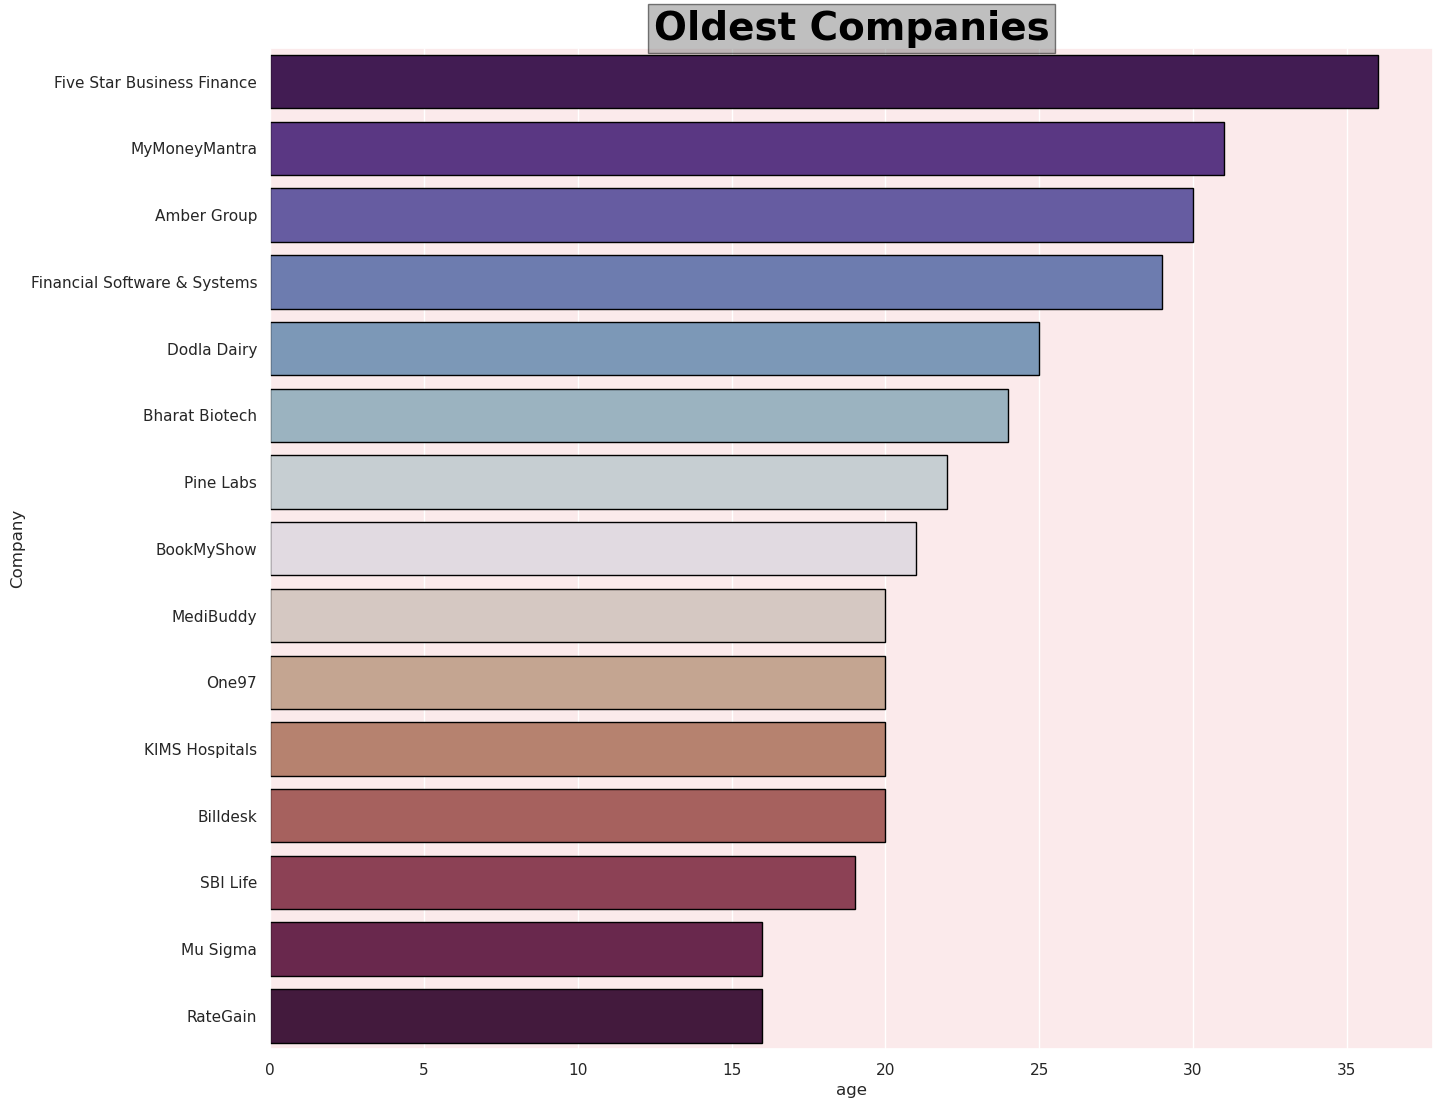

In [40]:
x=df[df["age"]>15][["Company","age"]].sort_values(by="age",ascending=False)
plt.figure(figsize=(15,13))
sns.barplot(x="age",y="Company",data=x,edgecolor="black",palette='twilight_shifted')
plt.title('Oldest Companies', fontdict={'fontsize': 28, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));



>## ➡️ These are the **Top 10 compnaies which are older than 15 years**

In [41]:
## What is the minimum, maximum and average fundings, no of investors
df[["Funding Amount in $","No. of Investors","age"]].agg(["mean","min","max"]).style.background_gradient(cmap='twilight_shifted')

,Funding Amount in $,No. of Investors,age
mean,314865494.003333,10.550000,6.606667
min,0.000000,0.000000,0.000000
max,24767620475.000000,45.000000,36.000000


In [42]:
# which company is with the zero funding amount 
df[df["Funding Amount in $"]== 0]

,Company,City,Starting Year,Founders,Industries,No. of Employees,Funding Amount in $,Funding Round,No. of Investors,Industries_type 1,Industries_type 2,age,age_category
285,WOW Skin Science India Ltd,Bengaluru,2016,Not Available,"Beauty, Consumer Goods, Cosmetics, Fashion",Not Available,0,0,0,Beauty,Consumer Goods,4,new company


In [43]:
# Which comapnies has 15+ funding rounds
df[df["Funding Round"]>15][["Company","Starting Year","Funding Round","Funding Amount in $","Industries_type 1"]].sort_values(by="Funding Round",ascending=False).style.background_gradient(cmap="twilight_shifted")

,Company,Starting Year,Funding Round,Funding Amount in $,Industries_type 1
11,Ola,2010,25,3808672049,Apps
41,Flipkart,2007,24,9009184737,E-Commerce
113,Aye Finance,2014,23,261193454,Finance
107,Zomato,2008,21,2100568357,Food Delivery
50,ZoomCar,2012,20,274145634,Automotive
80,Rebel Foods,2011,20,342349901,E-Commerce
181,VerSe Innovation,2007,20,434009213,Content
23,BYJU’S,2011,18,2745964432,E-Learning
8,BigBasket,2011,17,1119863468,Delivery
239,OYO,2012,17,3439351106,Hospitality


>## ➡️ Ola has gone to maximum funding rounds which is **25** and raised about **38,08,672,049** fundings

In [44]:
df[df["No. of Investors"]>25][["Company","Starting Year","No. of Investors","Industries_type 1"]].sort_values(by="No. of Investors",ascending=False).style.background_gradient(cmap="twilight_shifted")

,Company,Starting Year,No. of Investors,Industries_type 1
11,Ola,2010,45,Apps
23,BYJU’S,2011,38,E-Learning
10,Unacademy,2015,36,E-Learning
50,ZoomCar,2012,36,Automotive
32,Reliance Jio,2010,35,Apps
69,cure.fit,2016,33,Apps
31,Rapido,2015,32,Information Services
88,Trell,2016,31,Lifestyle
4,Razorpay,2014,29,Financial Services
13,CRED,2018,28,Credit Cards


>## ➡️ **Ola** has highest no of investors which is **45** starting year from 2010 and raised about **38,08,672,049** fundings where as **byju's** also have a good amount of investors which is **38**

In [45]:
df.to_csv("startups.csv")

<h1 style="color: black; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;font-size: 36px;">Analysis Finished </h1>

<h1 style="color: red; text-align:center; padding: 10px; font-family:cursive; font-size: 48px;">If You Like it please do upvote📌 & Comment💬</h1>